## Passo 1: "Collect initial data report"

In [77]:
from datasets import load_dataset

ds = load_dataset("mstz/heloc")

In [78]:
# Importando bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Convertendo o dataset para DataFrame
df = pd.DataFrame(ds['train'])

## Passo 2: "Describe Data"

In [79]:
print("Informações gerais do dataset:")
print("-" * 50)
print(f"Número total de registros: {len(df)}")
print(f"Número de features: {len(df.columns)}")
print("\nTipos de dados:")
print(df.dtypes)

# Análise de dados ausentes
print("\nDados ausentes por coluna:")
missing = df.isnull().sum()
print(missing[missing > 0])

# Estatísticas descritivas
print("\nEstatísticas descritivas:")
print(df.describe())

Informações gerais do dataset:
--------------------------------------------------
Número total de registros: 10459
Número de features: 24

Tipos de dados:
estimate_of_risk                            int64
months_since_first_trade                    int64
months_since_last_trade                     int64
average_duration_of_resolution              int64
number_of_satisfactory_trades               int64
nr_trades_insolvent_for_over_60_days        int64
nr_trades_insolvent_for_over_90_days        int64
percentage_of_legal_trades                  int64
months_since_last_illegal_trade             int64
maximum_illegal_trades_over_last_year       int64
maximum_illegal_trades                      int64
nr_total_trades                             int64
nr_trades_initiated_in_last_year            int64
percentage_of_installment_trades            int64
months_since_last_inquiry_not_recent        int64
nr_inquiries_in_last_6_months               int64
nr_inquiries_in_last_6_months_not_recent    i

## Passo 3: "Explore Data" 

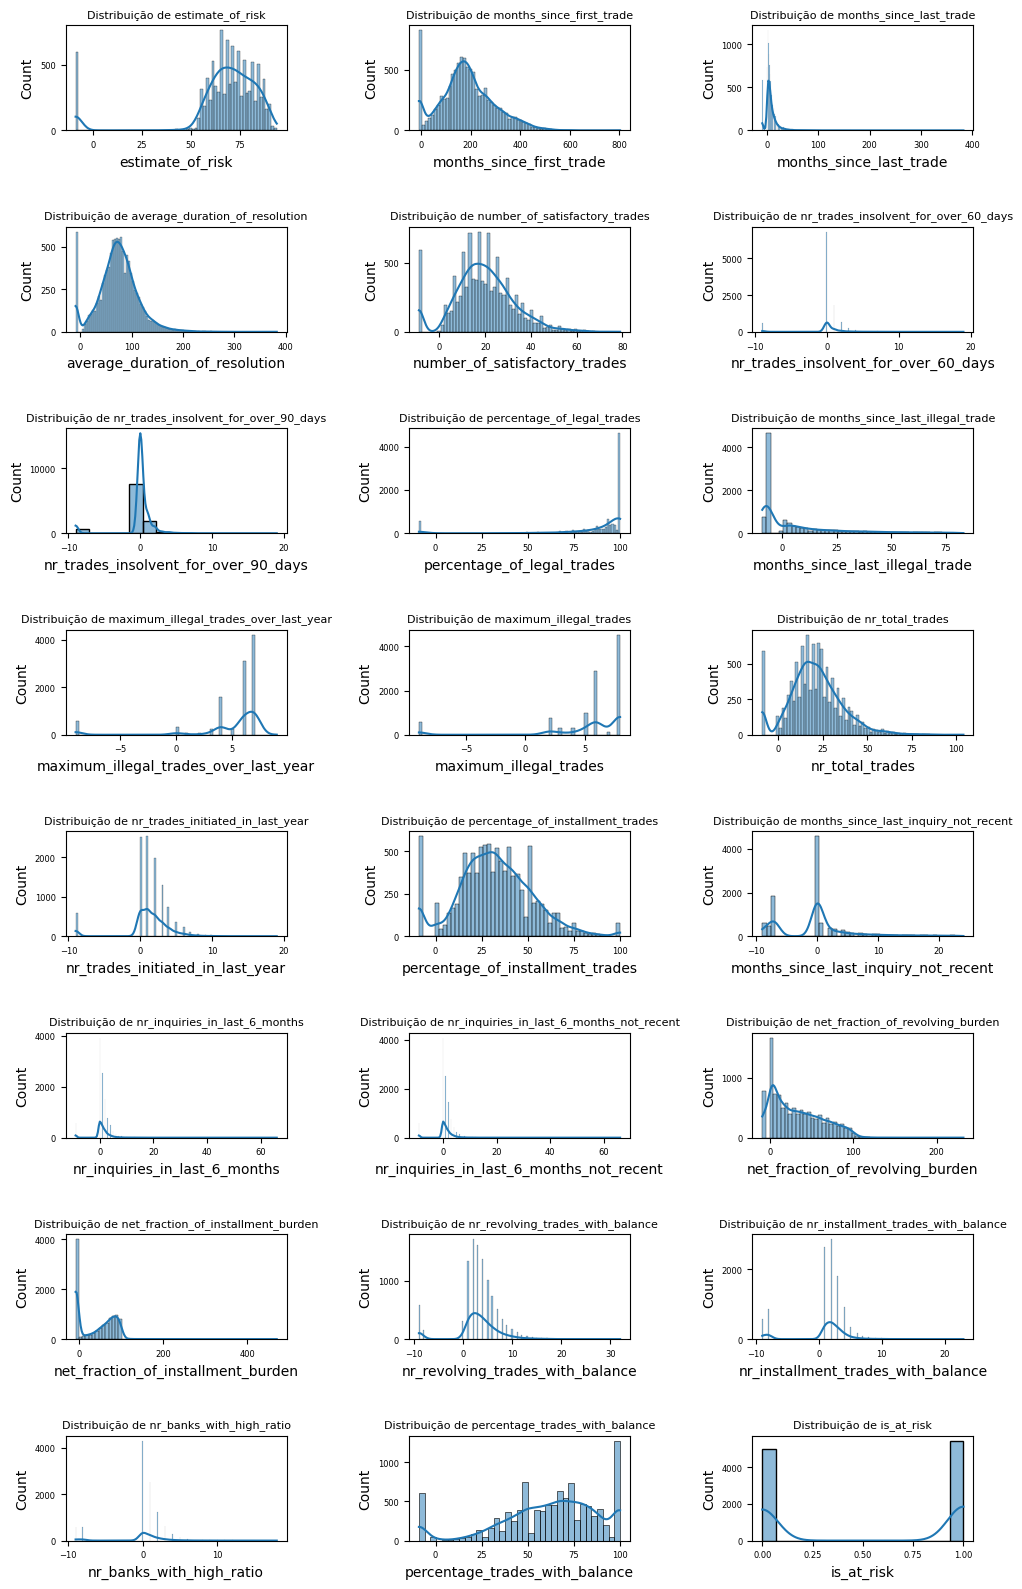

In [80]:
# Análise de distribuição das variáveis numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols
plt.figure(figsize=(10, 2*n_rows))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribuição de {col}', fontsize=8)
    plt.xticks(fontsize=6)
    plt.yticks(fontsize=6)
plt.tight_layout(h_pad=3, w_pad=5)
plt.show()

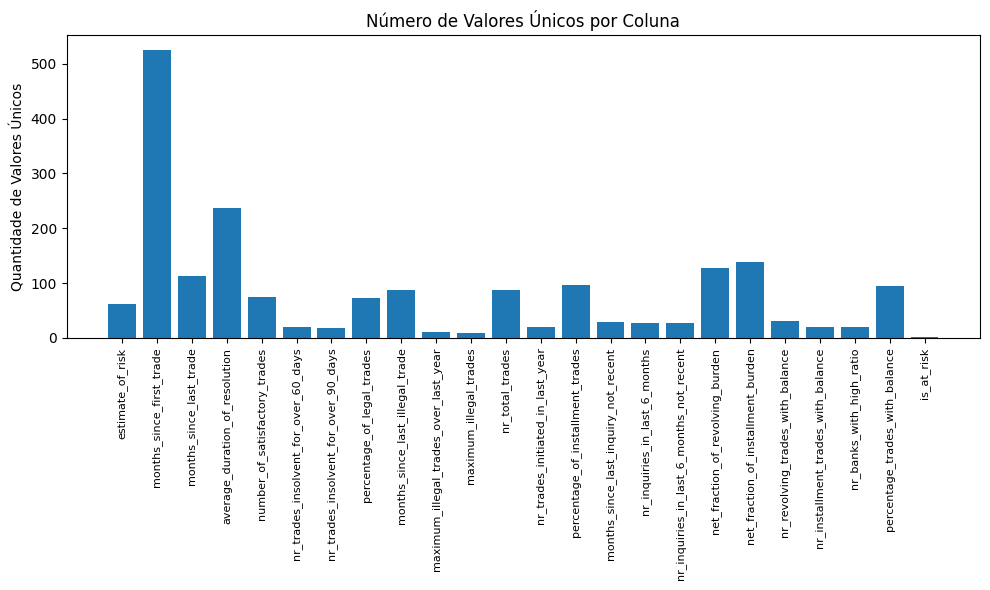

In [81]:
# Verificação de inconsistências
plt.figure(figsize=(10, 6))
unique_values = [df[col].nunique() for col in df.columns]
plt.bar(df.columns, unique_values)
plt.xticks(rotation=90, fontsize=8)  # Diminuindo a fonte dos nomes das características
plt.title('Número de Valores Únicos por Coluna')
plt.ylabel('Quantidade de Valores Únicos')
plt.tight_layout()
plt.show()

In [82]:
# Verificando valores negativos em cada coluna
print("Valores negativos por coluna:")
for col in df.columns:
    neg_values = df[df[col] < 0][col]
    if len(neg_values) > 0:
        print(f"\n{col}:")
        print("Valores únicos negativos:", neg_values.unique())
        print("Qtd de cada valor negativo: ", end='')
        print(neg_values.value_counts())

Valores negativos por coluna:

estimate_of_risk:
Valores únicos negativos: [-9]
Qtd de cada valor negativo: estimate_of_risk
-9    598
Name: count, dtype: int64

months_since_first_trade:
Valores únicos negativos: [-9 -8]
Qtd de cada valor negativo: months_since_first_trade
-9    588
-8    239
Name: count, dtype: int64

months_since_last_trade:
Valores únicos negativos: [-9]
Qtd de cada valor negativo: months_since_last_trade
-9    588
Name: count, dtype: int64

average_duration_of_resolution:
Valores únicos negativos: [-9]
Qtd de cada valor negativo: average_duration_of_resolution
-9    588
Name: count, dtype: int64

number_of_satisfactory_trades:
Valores únicos negativos: [-9]
Qtd de cada valor negativo: number_of_satisfactory_trades
-9    588
Name: count, dtype: int64

nr_trades_insolvent_for_over_60_days:
Valores únicos negativos: [-9]
Qtd de cada valor negativo: nr_trades_insolvent_for_over_60_days
-9    588
Name: count, dtype: int64

nr_trades_insolvent_for_over_90_days:
Valores 

In [83]:
# Análise estatística básica das colunas
print("Análise estatística das colunas:")
print("\nColuna".ljust(40), "Mínimo".rjust(15), "Máximo".rjust(15), "Média".rjust(15))
print("-" * 85)
for col in [col for col in df.columns if col != 'is_at_risk']:
    min_val = df[col].min()
    max_val = df[col].max()
    mean_val = df[col].mean()
    print(f"{col:<40} {min_val:>15.2f} {max_val:>15.2f} {mean_val:>15.2f}")


Análise estatística das colunas:

Coluna                                           Mínimo          Máximo           Média
-------------------------------------------------------------------------------------
estimate_of_risk                                   -9.00           94.00           67.43
months_since_first_trade                           -9.00          803.00          184.21
months_since_last_trade                            -9.00          383.00            8.54
average_duration_of_resolution                     -9.00          383.00           73.84
number_of_satisfactory_trades                      -9.00           79.00           19.43
nr_trades_insolvent_for_over_60_days               -9.00           19.00            0.04
nr_trades_insolvent_for_over_90_days               -9.00           19.00           -0.14
percentage_of_legal_trades                         -9.00          100.00           86.66
months_since_last_illegal_trade                    -9.00           83.00        

## Atributos

### estimate_of_risk
Indicador consolidado de marcadores de risco, avaliação externa do risco do mutuário.

### months_since_first_trade
Número de meses desde a primeira transação aberta.

### months_since_last_trade	
Número de meses desde a última transação aberta.

### average_duration_of_resolution	
Média de meses em arquivo (transações abertas mas não resolvidas), possivelmente a idade média das transações.

### number_of_satisfactory_trades	
Número de transações em bom estado, sem atrasos ou inadimplências.

### nr_trades_insolvent_for_over_60_days	
Número de transações insolventes por mais de 60 dias.

### nr_trades_insolvent_for_over_90_days	
Número de transações insolventes por mais de 90 dias.

### percentage_of_legal_trades	
Porcentagem de transações nunca inadimplentes (sem atrasos).

### months_since_last_illegal_trade	
Número de meses desde a última transação que se tornou inadimplente.

### maximum_illegal_trades_over_last_year	
Número máximo de transações inadimplentes em qualquer mês nos últimos 12 meses.

### maximum_illegal_trades	
Número máximo de transações inadimplentes que o mutuário já teve.

### nr_total_trades	
Total de transações que o mutuário possui.

### nr_trades_initiated_in_last_year	
Número de novas transações abertas no último ano.

### percentage_of_installment_trades	
Porcentagem de transações que são empréstimos a prestações.

### months_since_last_inquiry_not_recent	
Número de meses desde a última consulta de crédito, excluindo as muito recentes.

### nr_inquiries_in_last_6_months	
Número de vezes que o crédito foi verificado nos últimos 6 meses.

### nr_inquiries_in_last_6_months_not_recent	
Número de consultas de crédito nos últimos 6 meses, excluindo a mais recente.

### net_fraction_of_revolving_burden	
Fração líquida do crédito usada em contas rotativas, indicando utilização de crédito.

### net_fraction_of_installment_burden	
Fração líquida do crédito usada em contas a prestações, indicando dívida de empréstimos.

### nr_revolving_trades_with_balance	
Número de transações rotativas com saldo atual.

### nr_installment_trades_with_balance	
Número de transações a prestações com saldo atual.

### nr_banks_with_high_ratio	
Número de bancos com contas de alta taxa de utilização.

### percentage_trades_with_balance	
Porcentagem de transações com saldo atual, indicando uso.

### is_at_risk (Target)
Indicador binário (não/sim ou Bom/Ruim) se o mutuário está em risco de não pagar o HELOC em 2 anos.


In [84]:
# Verificando valores ausentes
missing_values = df.isnull().sum()
missing_pct = (missing_values / len(df)) * 100

# Criando um DataFrame com informações sobre valores ausentes
missing_info = pd.DataFrame({
    'Missing Values': missing_values,
    'Missing Percentage': missing_pct
})

print("Análise de Valores Ausentes:")
print(missing_info[missing_info['Missing Values'] > 0])

Análise de Valores Ausentes:
Empty DataFrame
Columns: [Missing Values, Missing Percentage]
Index: []


## Passo 4: "Verify Data Quality"

In [85]:
# Contando linhas com valores negativos
print("\nQuantidade de linhas com valores negativos:", len(df[(df < 0).any(axis=1)]))

# Contando linhas com 2 ou mais valores negativos
print("\nQuantidade de linhas com 2 ou mais valores negativos:", 
      len(df[(df < 0).sum(axis=1) >= 2]))



Quantidade de linhas com valores negativos: 7957

Quantidade de linhas com 2 ou mais valores negativos: 4094


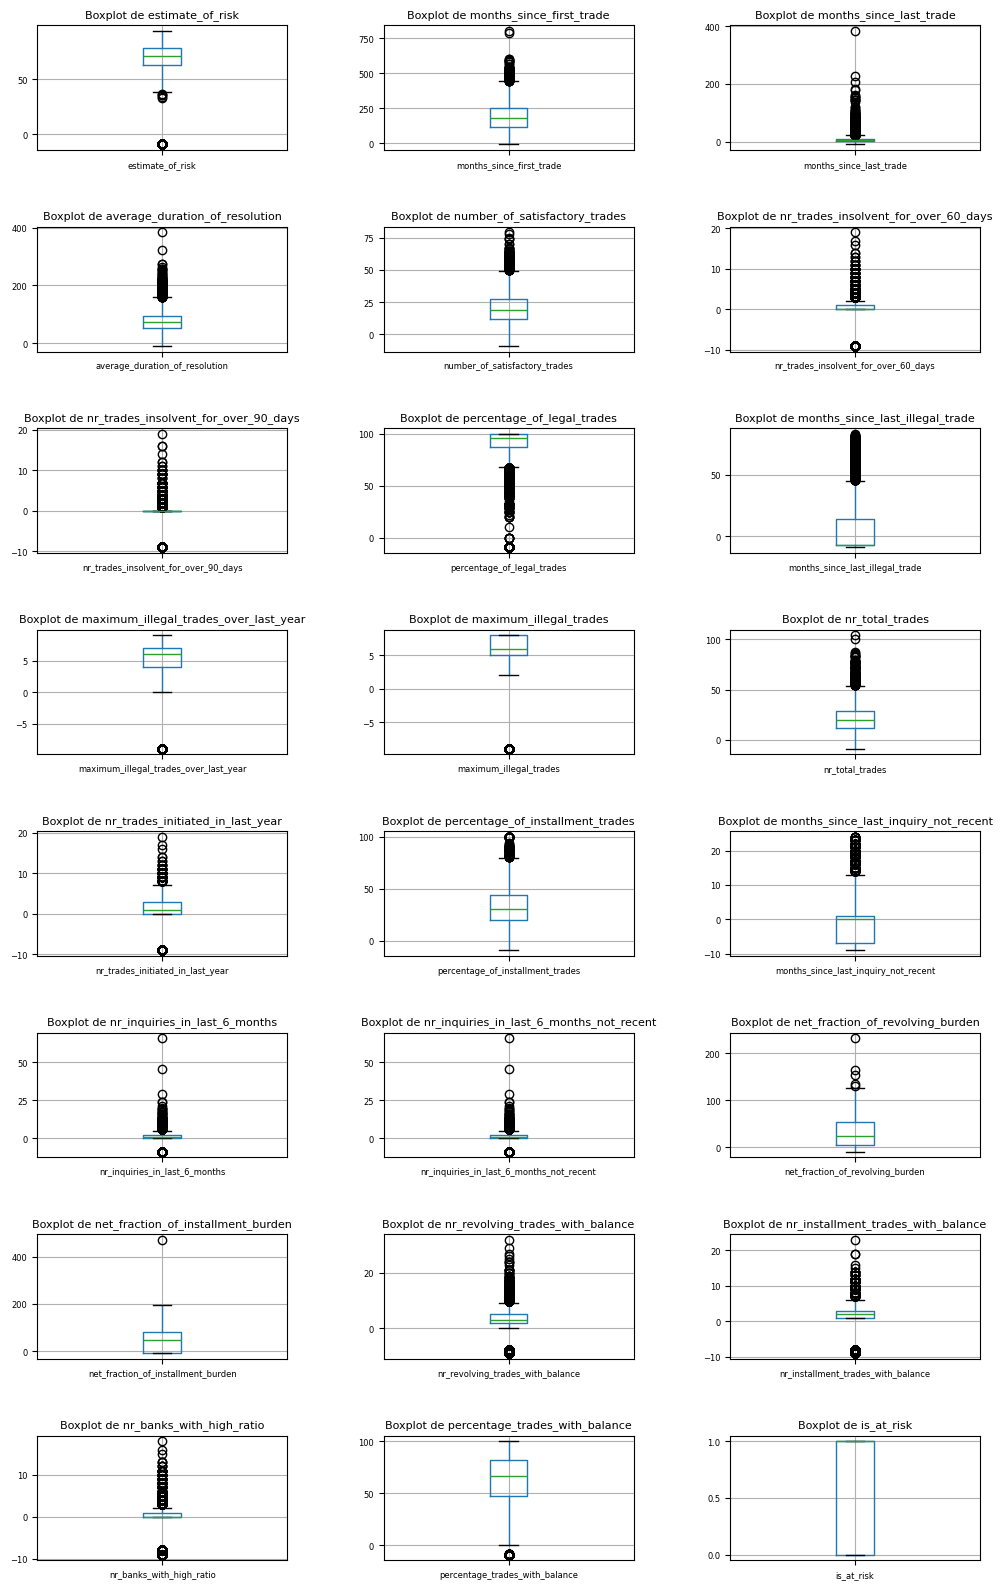

In [86]:
# Identificação de outliers usando boxplots
numeric_cols = df.select_dtypes(include=[np.number]).columns
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols
plt.figure(figsize=(10, 2*n_rows))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    df.boxplot(column=col)
    plt.title(f'Boxplot de {col}', fontsize=8)
    plt.xticks(fontsize=6)
    plt.yticks(fontsize=6)

plt.tight_layout(h_pad=3, w_pad=5)
plt.show()